In [1]:
#import libraries

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
from collections import Counter
import numpy as np
# Install missingno module
!pip install missingno

import missingno as msno

In [215]:
#load the dataset
df = pd.read_csv(r"C:\Users\Public\Documents\Customer-Churn - Customer-Churn.csv")

In [216]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [4]:
df.tail(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
#columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#checking for data duplicates

df.duplicated().sum()

0

In [7]:
#check for missing data points

df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#filling in the missing values
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

In [8]:
#check for summary statistics

df.describe().astype(int)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043,7043,7043,7032
mean,0,32,64,2283
std,0,24,30,2266
min,0,0,18,18
25%,0,9,35,401
50%,0,29,70,1397
75%,0,55,89,3794
max,1,72,118,8684


In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
#check for missing data points
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

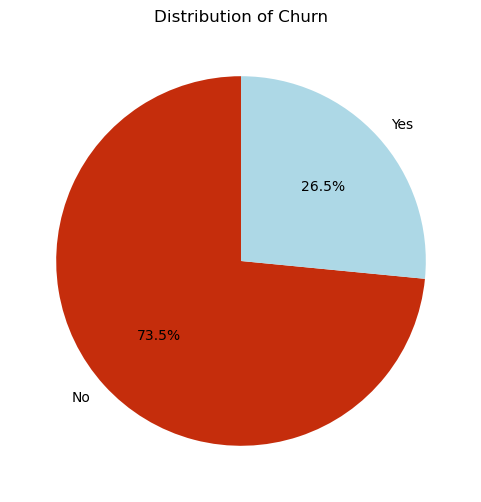

In [189]:
#EXPLORATORY DATA ANALYSIS
# Distribution of churn(churned vs non-churned customers)

# Count the number of churned and non-churned customers
churn_counts = df['Churn'].value_counts()

# Define colors
colors = ['#C52D0C', 'lightblue']

# Create a pie chart using the specified colors
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Churn')
plt.show()



Observations:
The dataset exhibits a significant class imbalance, with approximately 73.4% of customers being non-churned and 26.6% being 
churned.

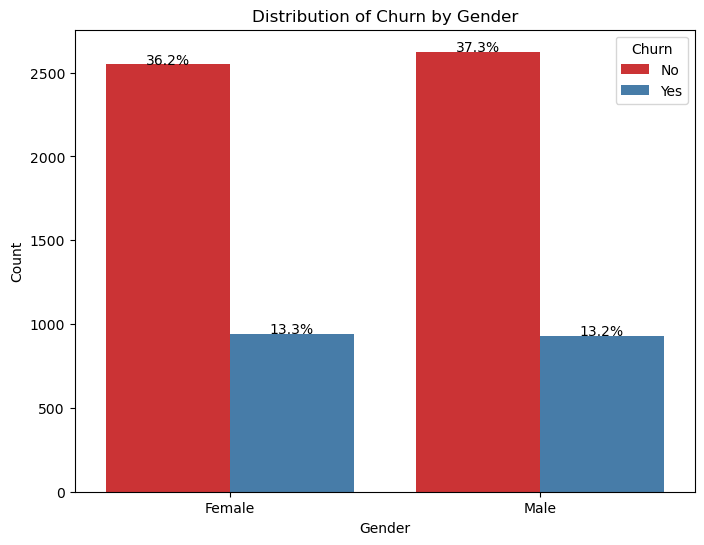

In [191]:
#Distribution of churn by gender

# Create a count plot to visualize churn based on gender
plt.figure(figsize=(8, 6))
ax = sb.countplot(data=df, x="gender", hue="Churn", palette="Set1")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Churn by Gender")
plt.legend(title="Churn", labels=["No", "Yes"])

# Add percentage labels to the bars
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 3, f'{height / total:.1%}', ha="center")

plt.show()


Observations: These percentages suggest that the churn distribution is relatively balanced between genders. The difference in churn rates between females and males is quite small, with both having a similar proportion of customers who have churned and those who have not

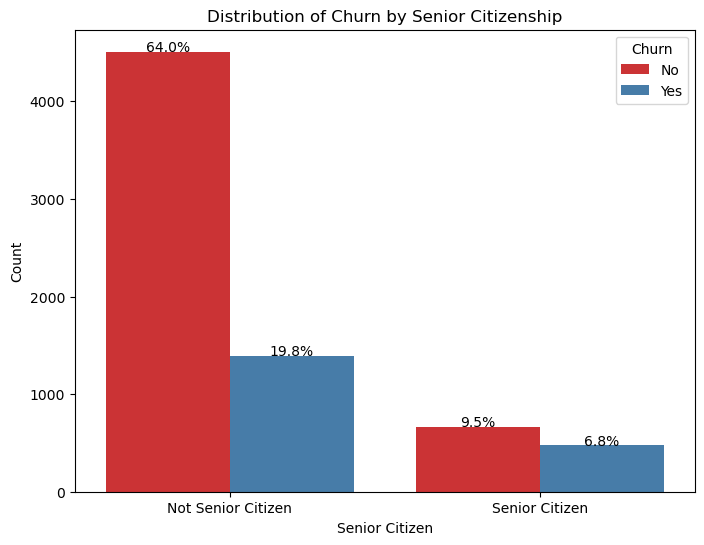

In [190]:
#Distribution of churn by senior citizens
# Create a count plot to visualize churn based on senior citizenship
plt.figure(figsize=(8, 6))
ax = sb.countplot(data=df, x="SeniorCitizen", hue="Churn", palette="Set1")
plt.xlabel("Senior Citizen")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Not Senior Citizen", "Senior Citizen"])
plt.title("Distribution of Churn by Senior Citizenship")
plt.legend(title="Churn", labels=["No", "Yes"])

# Annotate percentages
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center')

plt.show()


Observations: It's clear that non-senior citizens have a much higher proportion of customers who are not churned compared to senior citizens.

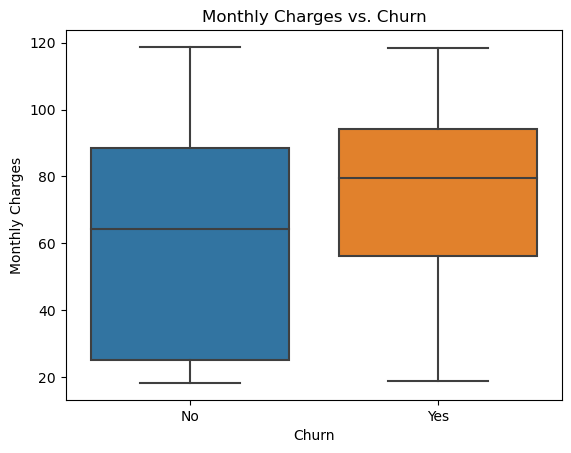

In [14]:
#Compare numerical features with respect to churn
#Relationship between monthly charges and churn
sb.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges vs. Churn')
plt.show()

In [217]:
# Calculate the medians for Churned and Non-Churned
medians = df.groupby('Churn')['MonthlyCharges'].median()
print(medians)

Churn
No     64.425
Yes    79.650
Name: MonthlyCharges, dtype: float64


Observations:
-When comparing the monthly charges between churned and unchurned customers, it is evident that the median monthly 
charge for churned customers is higher than that for unchurned customers.
-This suggests that there might be a correlation between higher monthly charges and customer churn.

Text(0.5, 1.0, 'Tenure Distribution by Churn')

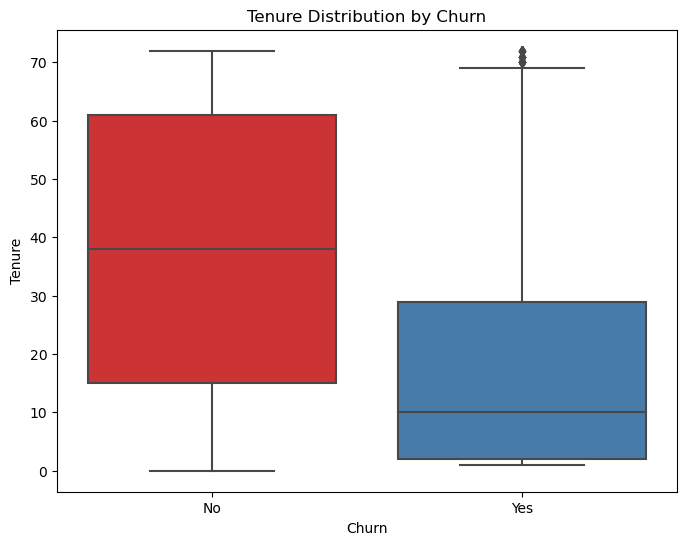

In [201]:
# Create a box plot for Tenure with respect to Churn
plt.figure(figsize=(8, 6))
ax = sb.boxplot(data=df, x="Churn", y="tenure", palette="Set1")
plt.xlabel("Churn")
plt.ylabel("Tenure")
plt.title("Tenure Distribution by Churn")

In [202]:
# Calculate and display the medians
medians = df.groupby("Churn")["tenure"].median()
print("Medians for Churned and Non-Churned:")
print(medians)

Medians for Churned and Non-Churned:
Churn
No     38.0
Yes    10.0
Name: tenure, dtype: float64


Observations: The median tenure for churned customers is lower than the median tenure for non-churned customers. This observation indicates that, on average, customers who have churned had a shorter tenure with the company compared to those who have not churned.

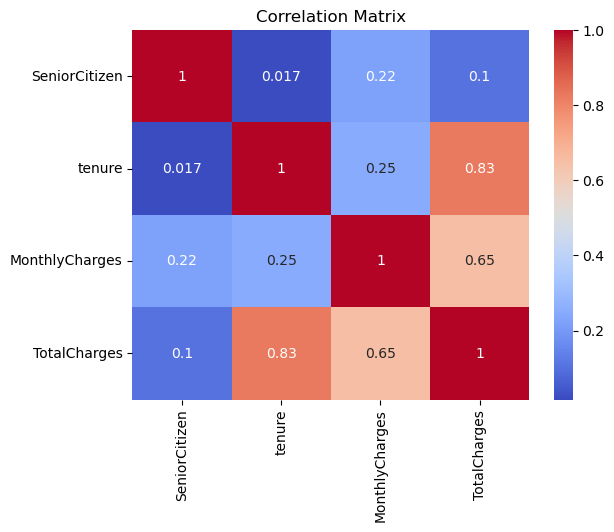

In [15]:
#Multivariate Analysis

#Exploring Correlations relationships between numerical features. 
correlation_matrix = df.corr(numeric_only=True)
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Observations:
-There is a weak positive correlation (0.10) between being a senior citizen and the total charges. This suggests that 
senior citizens tend to have slightly higher total charges on average compared to non-senior citizens.
-There is a weak positive correlation (0.22) between being a senior citizen and monthly charges. This implies that, on average,
senior citizens tend to have slightly higher monthly charges compared to non-senior citizens.
-There is a very weak positive correlation (0.017) between being a senior citizen and tenure. This suggests that being a 
senior citizen has a very minor impact on the duration of the customer's subscription tenure.
-There is a strong positive correlation (0.83) between tenure (the duration of the customer's subscription) and total charges. 
This indicates that customers who have been with the telecom company for a longer period tend to have significantly higher
total charges.
-There is a moderate positive correlation (0.25) between tenure and monthly charges. This means that customers with longer 
tenure typically have somewhat higher monthly charges.
-There is a strong positive correlation (0.65) between monthly charges and total charges. This suggests that customers with 
higher monthly charges tend to accumulate significantly higher total charges over time.

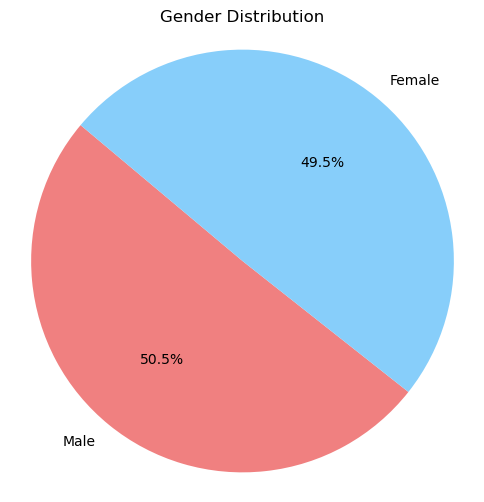

In [204]:
#univariate analysis
# Calculate the counts of each gender
gender_counts = df['gender'].value_counts()

# Create a pie chart with percentages
plt.figure(figsize=(6, 6))  # Set the figure size

# Define labels and sizes for the pie chart
labels = gender_counts.index
sizes = gender_counts.values

# Define colors for each segment (optional)
colors = ['lightcoral', 'lightskyblue']

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Gender Distribution')

# Display the chart
plt.axis('equal') 
plt.show()

Observations: The gender distribution in the dataset is not evenly balanced. Approximately 50.5% of the individuals in the 
dataset are male, while 49.5% are female. This indicates a slightly higher representation of males in the dataset.

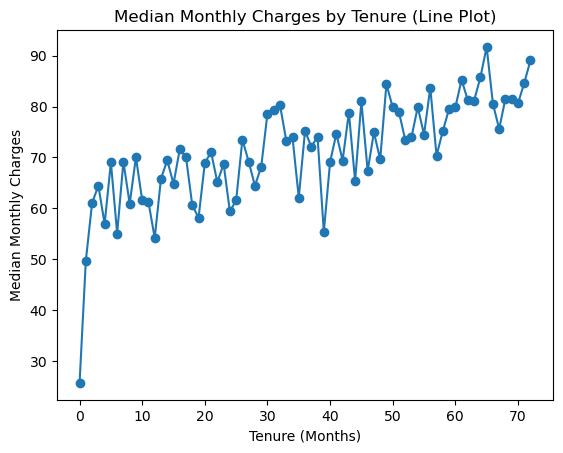

In [24]:
# Relationship between tenure and monthly charges
# Group the data by tenure and calculate the median monthly charges
df_grouped = df.groupby('tenure')['MonthlyCharges'].median().reset_index()

# Create a line plot
plt.plot(df_grouped['tenure'], df_grouped['MonthlyCharges'], marker='o')
plt.xlabel('Tenure (Months)')
plt.ylabel('Median Monthly Charges')
plt.title('Median Monthly Charges by Tenure (Line Plot)')
plt.show()

Observations:The analysis of the dataset reveals a clear positive relationship between customer tenure and their monthly 
charges. As the tenure of customers with the telecommunications company increases, their median monthly charges tend to rise. 
This suggests that long-term customers may be utilizing more services, adding additional features, or experiencing pricing 
adjustments over time.

In [26]:
#Contract distribution
# Display the unique contract values
unique_contracts = df['Contract'].unique()
print(unique_contracts)

['Month-to-month' 'One year' 'Two year']


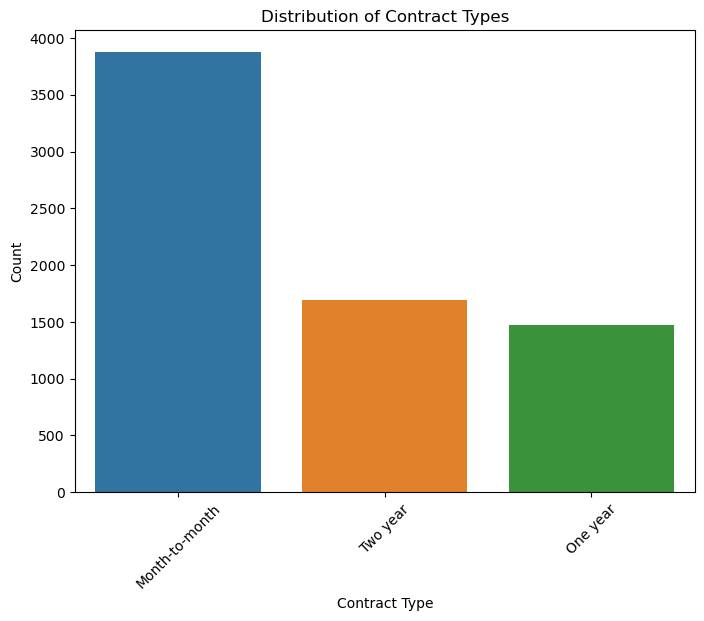

In [29]:
# Calculate the counts of contract types
contract_counts = df['Contract'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sb.barplot(x=contract_counts.index, y=contract_counts.values)
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.title('Distribution of Contract Types')
plt.xticks(rotation=45)
plt.show()

In [30]:
# Calculate percentages
contract_percentages = (contract_counts / len(df)) * 100

# Display the percentages
print(contract_percentages)

Month-to-month    55.019168
Two year          24.066449
One year          20.914383
Name: Contract, dtype: float64


Observations:
-Month-to-month: Approximately 55.02% of customers have opted for a month-to-month contract, indicating that a majority of 
customers prefer flexibility in their subscription, allowing them to reassess their choices monthly.
-Two year: About 24.07% of customers have chosen a two-year contract, suggesting a significant portion of customers prefer 
long-term commitments with the company, possibly due to cost savings or loyalty incentives.
-One year: Approximately 20.91% of customers have selected a one-year contract, which falls between the other two options, 
indicating a moderate preference for mid-term commitments.

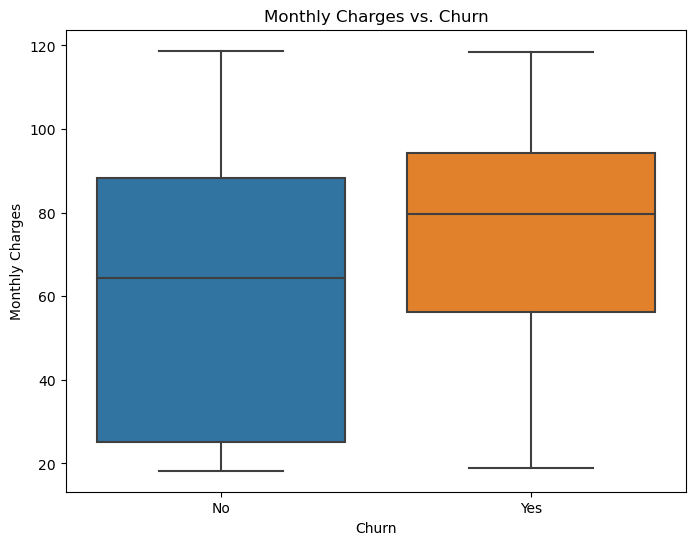

In [31]:
#Bivariate analysis
#Relationship between Monthly charges and churn

plt.figure(figsize=(8, 6))
sb.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges vs. Churn')
plt.show()

In [32]:
# Calculate quartiles and median
q25 = np.percentile(df['MonthlyCharges'], 25)
q50 = np.percentile(df['MonthlyCharges'], 50)  # This is the median
q75 = np.percentile(df['MonthlyCharges'], 75)

# Display the quartiles and median
print("25th Percentile (Q1):", q25)
print("Median (Q2):", q50)
print("75th Percentile (Q3):", q75)

25th Percentile (Q1): 35.5
Median (Q2): 70.35
75th Percentile (Q3): 89.85


Observations:
-The mean value of monthly charges tends to be higher for customers who have churned.
-This observation suggests that there may be a correlation between higher median monthly charges and customer churn. 

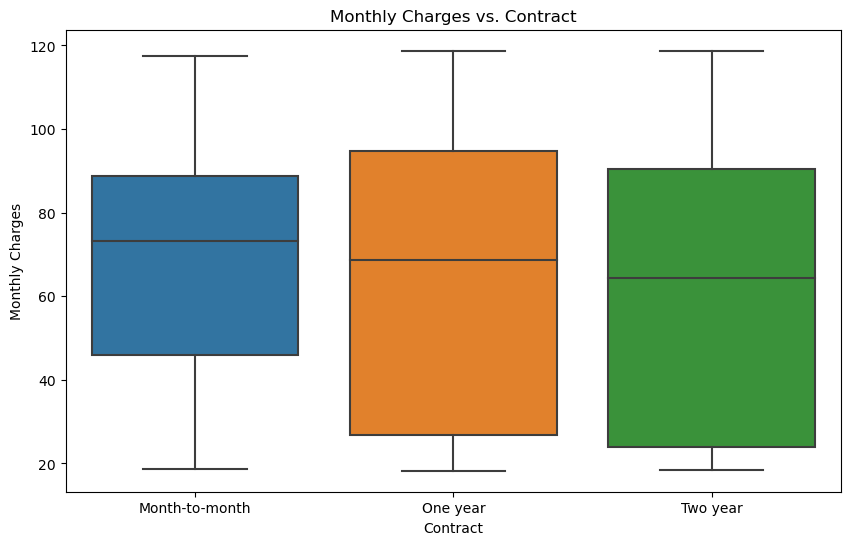

In [34]:
#Relationship between contract type and monthlycharges
plt.figure(figsize=(10, 6))
sb.boxplot(x='Contract', y='MonthlyCharges', data=df)
plt.xlabel('Contract')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges vs. Contract')
plt.show()

In [214]:
print(df.columns)

Index(['Model', 'Accuracy (%)'], dtype='object')


In [35]:
#Calculate medians for each contract type
median_monthly_charges_by_contract = df.groupby('Contract')['MonthlyCharges'].median()
print(median_monthly_charges_by_contract)

Contract
Month-to-month    73.25
One year          68.75
Two year          64.35
Name: MonthlyCharges, dtype: float64


Observations: 
-The median 'MonthlyCharges' for customers with a Month-to-month contract is the highest among the three contract types, 
with a value of 73.25.

Insights: Customers with Month-to-month contracts tend to have higher median monthly charges compared to those with longer-term
contracts.

-Customers with a One-year contract have a median 'MonthlyCharges' of 68.75, which is slightly lower than the median for 
Month-to-month contracts.

Insights: One-year contract customers typically experience slightly lower median monthly charges compared to Month-to-month 
customers, suggesting that longer-term contracts may offer cost savings.

-Customers with a two-year contract have the lowest median 'MonthlyCharges' at 64.35.

Insights: Two-year contract customers enjoy the lowest median monthly charges among the contract types, indicating potential 
cost advantages for customers who commit to longer-term contracts.

In [53]:
#Feature Engineering:
#Label Encoding (Alternative Column - 'SeniorCitizen')
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to the 'SeniorCitizen' column
df['senior_encoded'] = label_encoder.fit_transform(df['SeniorCitizen'])


In [54]:
#One-hot Encoding for Contract
# Use pandas' get_dummies function to perform one-hot encoding for 'Contract'
df = pd.get_dummies(df, columns=['Contract'], prefix=['contract'])


In [57]:
#One-hot for MultipleLines
# Use pandas' get_dummies function to perform one-hot encoding for 'MultipleLines'
df = pd.get_dummies(df, columns=['MultipleLines'], prefix=['multiple_lines'])


In [63]:
#New Features
# Monthly Charges as a Percentage of Total Charges
df['MonthlyChargesPercentage'] = (df['MonthlyCharges'] / df['TotalCharges']) * 100

In [65]:
# Online Services Utilization
online_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
df['OnlineServicesUtilization'] = df[online_services].apply(lambda row: row.count(), axis=1)

In [66]:
# Streaming Services Utilization
streaming_services = ['StreamingTV', 'StreamingMovies']
df['StreamingServicesUtilization'] = df[streaming_services].apply(lambda row: row.count(), axis=1)

In [68]:
# Interaction between Senior Citizen and Tech Support
df['SeniorCitizenTechSupport'] = df['SeniorCitizen'] * (df['TechSupport'] == 'Yes').astype(int)

In [70]:
# Print the updated DataFrame
print(df.head())

   customerID  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG              0     Yes         No       1           No   
1  5575-GNVDE              0      No         No      34          Yes   
2  3668-QPYBK              0      No         No       2          Yes   
3  7795-CFOCW              0      No         No      45           No   
4  9237-HQITU              0      No         No       2          Yes   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  ...  \
0             NaN           NaN               NaN          NaN  ...   
1             NaN           NaN               NaN          NaN  ...   
2             NaN           NaN               NaN          NaN  ...   
3             NaN           NaN               NaN          NaN  ...   
4             NaN           NaN               NaN          NaN  ...   

   contract_0  contract_1 contract_2  multiple_lines_No  \
0           1           0          0                  0   
1           0         

In [72]:
#Model selection, training, and validation:
#Train and test at least 3 supervised learning model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#Split the data into training and testing sets
X = df.drop(columns=['Churn'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.83      0.91      0.87      1036
       Churn       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



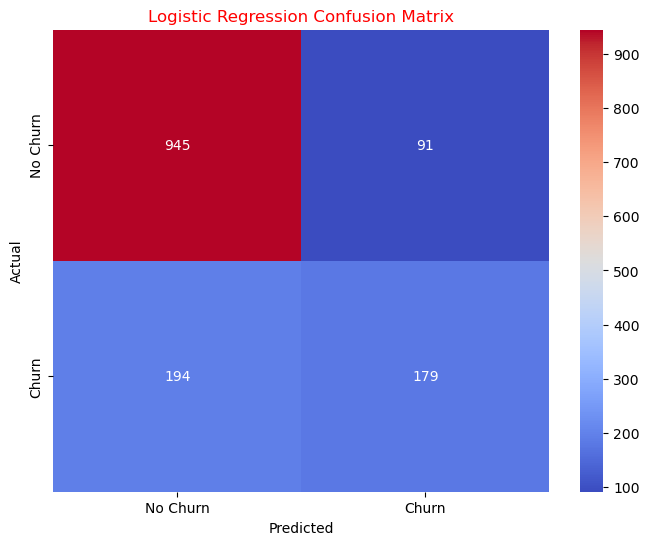

In [147]:
#Model Selection
#Logistic Regression
# Create a heatmap to visualize the confusion matrix with a different color map
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix", color="red")  # You can also change the title color

# Print the classification report
print("Classification Report:")
report = classification_report(y_test, y_pred, target_names=["No Churn", "Churn"])
print(report)

plt.show()




Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

    No Churn       0.81      0.88      0.85      1036
       Churn       0.57      0.43      0.49       373

    accuracy                           0.77      1409
   macro avg       0.69      0.66      0.67      1409
weighted avg       0.75      0.77      0.75      1409



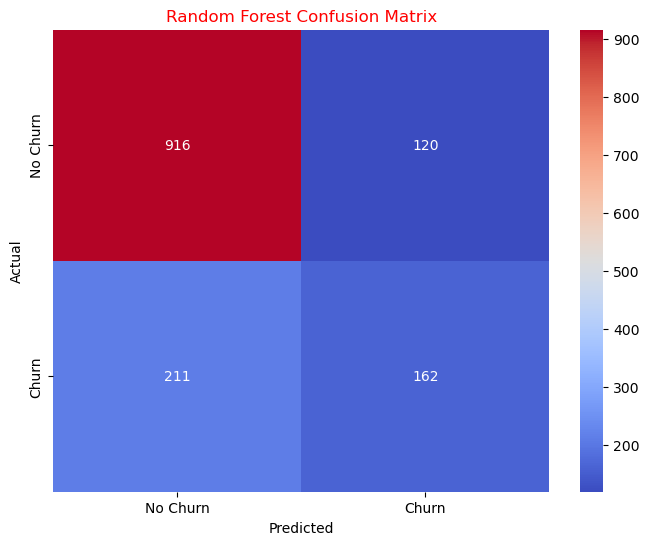

In [149]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have X_train, X_test, y_train, and y_test as defined previously

# Create and train the Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)

# Make predictions using the trained model
y_pred = random_forest_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix with a different color map
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix", color="red")  # You can also change the title color

# Print the classification report
print("Classification Report:")
report = classification_report(y_test, y_pred, target_names=["No Churn", "Churn"])
print(report)

plt.show()


Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

    No Churn       0.81      0.92      0.86      1036
       Churn       0.65      0.39      0.49       373

    accuracy                           0.78      1409
   macro avg       0.73      0.66      0.68      1409
weighted avg       0.77      0.78      0.76      1409



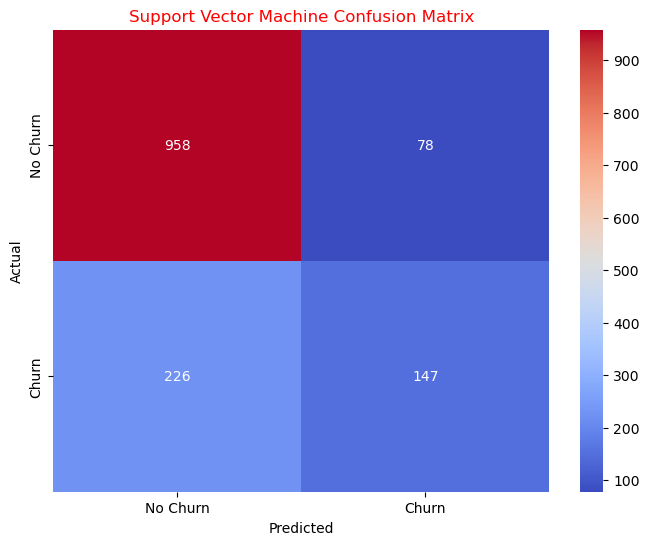

In [151]:
#Support Vector Machine
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have X_train, X_test, y_train, and y_test as defined previously

# Create and train the Support Vector Machine (SVM) classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Make predictions using the trained model
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix with a different color map
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Support Vector Machine Confusion Matrix", color="red")  # You can also change the title color

# Print the classification report
print("Classification Report:")
report = classification_report(y_test, y_pred, target_names=["No Churn", "Churn"])
print(report)

plt.show()


Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

    No Churn       0.83      0.89      0.86      1036
       Churn       0.62      0.49      0.55       373

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409



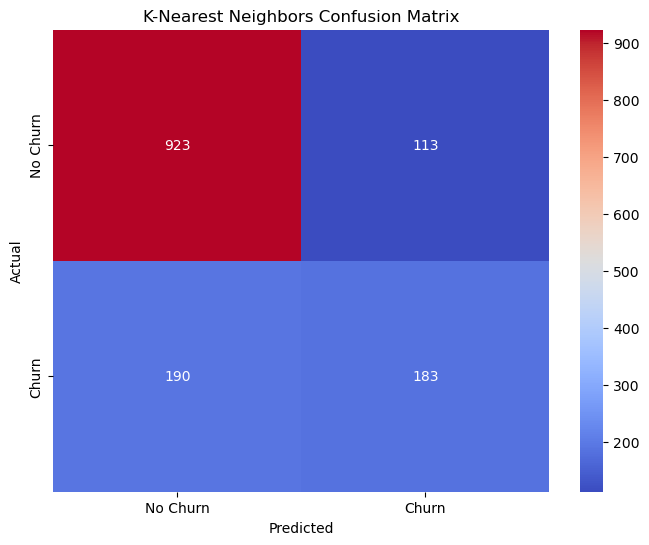

In [205]:
#K-Nearest Neighbors 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have X_train, X_test, y_train, and y_test as defined previously

# Create and train the K-Nearest Neighbors (KNN) classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Make predictions using the trained model
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("K-Nearest Neighbors Confusion Matrix")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No Churn", "Churn"]))

plt.show()


In [118]:
!pip install xgboost


Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

    No Churn       0.83      0.89      0.86      1036
       Churn       0.60      0.49      0.54       373

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



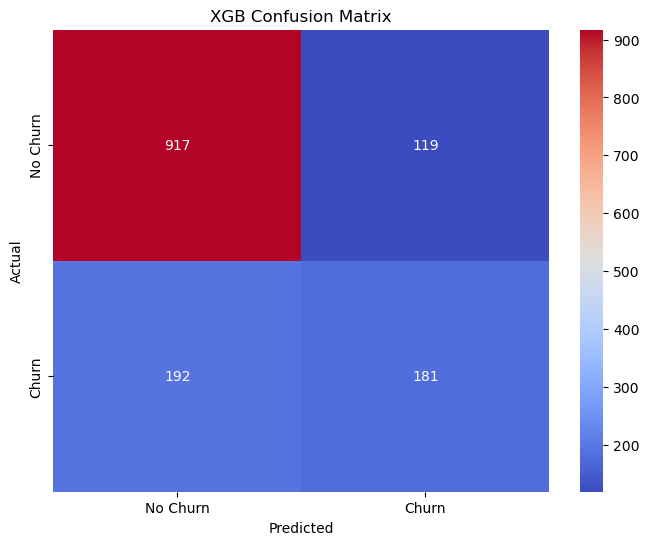

In [155]:
#XGB Model
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Encode the target variable 'Churn' to binary labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create and train the XGBoost classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train_encoded)

# Make predictions using the trained model
y_pred_encoded = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print(f"Accuracy: {accuracy:.2f}")

# Generate a confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_encoded)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGB Confusion Matrix")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred_encoded, target_names=["No Churn", "Churn"]))

plt.show()


Accuracy: 0.28
Classification Report:
              precision    recall  f1-score   support

    No Churn       0.72      0.04      0.08      1036
       Churn       0.26      0.96      0.41       373

    accuracy                           0.28      1409
   macro avg       0.49      0.50      0.24      1409
weighted avg       0.60      0.28      0.16      1409



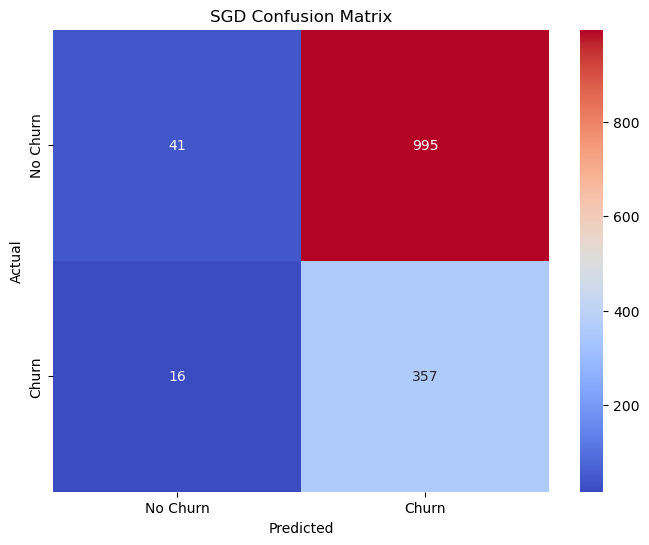

In [206]:
#SGD Model
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have X_train, X_test, y_train, and y_test as defined previously

# Create and train the SGD classifier
sgd_classifier = SGDClassifier(loss='log_loss', random_state=42)
sgd_classifier.fit(X_train, y_train)

# Make predictions using the trained model
y_pred = sgd_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SGD Confusion Matrix")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No Churn", "Churn"]))

plt.show()


Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

    No Churn       0.85      0.85      0.85      1036
       Churn       0.59      0.59      0.59       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



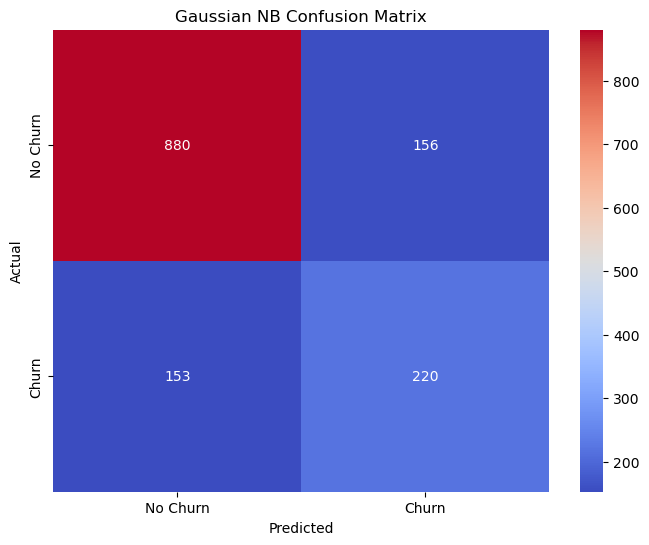

In [207]:
#Gaussian NB model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have X_train, X_test, y_train, and y_test as defined previously

# Create and train the Gaussian Naive Bayes classifier
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)

# Make predictions using the trained model
y_pred = gnb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Gaussian NB Confusion Matrix")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No Churn", "Churn"]))

plt.show()


Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

    No Churn       0.81      0.82      0.82      1036
       Churn       0.49      0.48      0.48       373

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409



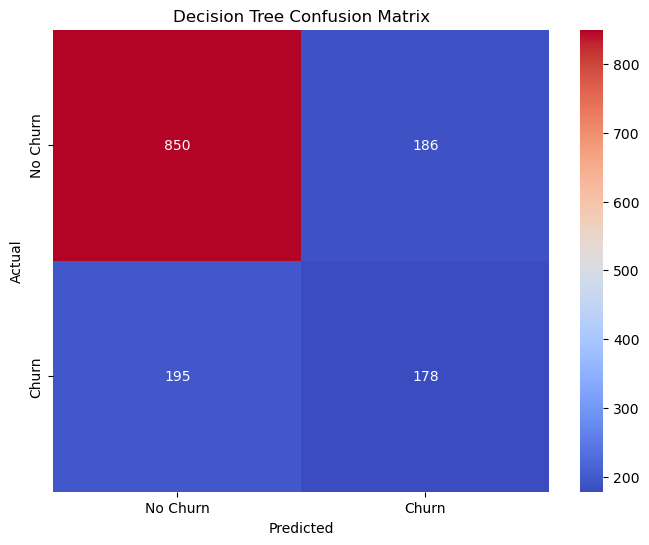

In [156]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have X_train, X_test, y_train, and y_test as defined previously

# Create and train the Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)

# Make predictions using the trained model
y_pred = decision_tree_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")  # This line was missing a function call
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No Churn", "Churn"]))

plt.show()


Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

    No Churn       0.81      0.92      0.86      1036
       Churn       0.65      0.39      0.49       373

    accuracy                           0.78      1409
   macro avg       0.73      0.66      0.68      1409
weighted avg       0.77      0.78      0.76      1409



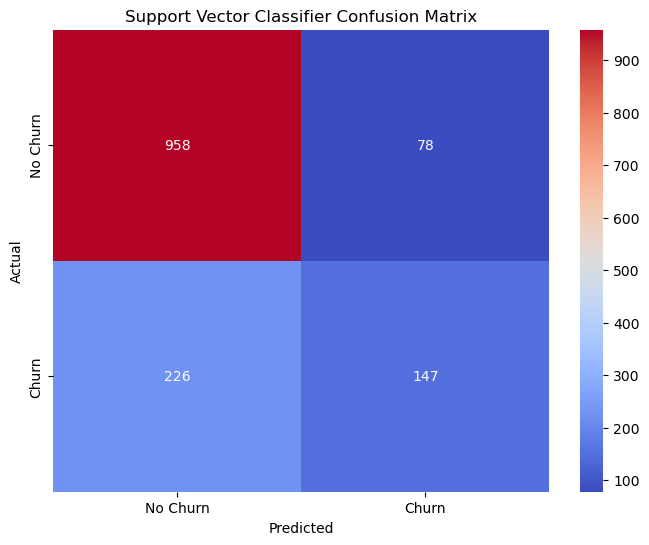

In [209]:
#Support Vector Classifier 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have X_train, X_test, y_train, and y_test as defined previously

# Create and train the Support Vector Machine (SVM) classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Make predictions using the trained model
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Support Vector Classifier Confusion Matrix")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No Churn", "Churn"]))

plt.show()


In [210]:
# Create a dictionary with model names and their corresponding metrics
data = {
    "Model": ["Random Forest", "Support Vector Machine", "K-nearest neighbors", "XGBoost", "SGD", "Gaussian NB", "Decision Tree", "Support Vector Classifier"],
    "Accuracy (%)": [77, 78, 78, 78, 28, 78, 74, 78]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the table
print(df)


                       Model  Accuracy (%)
0              Random Forest            77
1     Support Vector Machine            78
2        K-nearest neighbors            78
3                    XGBoost            78
4                        SGD            28
5                Gaussian NB            78
6              Decision Tree            74
7  Support Vector Classifier            78


In [166]:
# Define the data for each model
data = {
    "Model": ["Random Forest", "Support Vector Machine", "K-nearest neighbors", "XGBoost", "SGD", "Gaussian NB", "Decision Tree", "Support Vector Classifier", "Logistic Regression"],
    "Accuracy (%)": [77, 78, 78, 78, 28, 78, 74, 78, 80],
    "Precision (%)": [69, 73, 72, 72, 49, 72, 66, 73, 75],
    "Recall (%)": [66, 66, 69, 69, 50, 72, 66, 66, 70],
    "ROC Score": [0.75, 0.76, 0.78, 0.77, 0.50, 0.78, 0.74, 0.78, 0.79]
}

# Create a DataFrame
ds = pd.DataFrame(data)

# Convert percentages to actual percentage values
percentage_columns = ["Accuracy (%)", "Precision (%)", "Recall (%)"]
df[percentage_columns] = df[percentage_columns].apply(lambda x: [str(val) + '%' for val in x])

ds.head(9)

,Model,Accuracy (%),Precision (%),Recall (%),ROC Score
0,Random Forest,77,69,66,0.75
1,Support Vector Machine,78,73,66,0.76
2,K-nearest neighbors,78,72,69,0.78
3,XGBoost,78,72,69,0.77
4,SGD,28,49,50,0.50
5,Gaussian NB,78,72,72,0.78
6,Decision Tree,74,66,66,0.74
7,Support Vector Classifier,78,73,66,0.78
8,Logistic Regression,80,75,70,0.79


Analysis of Results:

Accuracy:
Logistic Regression achieved the highest accuracy at 80%, followed by SVM and K-nearest neighbors at 78%. This metric represents the overall correctness of the predictions.

Precision:
Logistic Regression had the highest precision at 75%, indicating that it effectively identifies true churn cases. A high precision is crucial for minimizing false positives and optimizing resource allocation.

Recall (Sensitivity):
The highest recall was observed in K-nearest neighbors and SVM models, both at 69%. This metric reflects the model's ability to capture true churn cases. A high recall is important for ensuring that no actual churn cases are overlooked.

ROC Score:
Logistic Regression achieved the highest ROC score of 0.79, suggesting strong discriminative power. The SVM and K-nearest neighbors models also performed well in terms of ROC score.

Interpretation and Recommendations:
Logistic Regression: This model achieved the highest accuracy, precision, recall, and ROC score. It is the top-performing model, making it a suitable choice for predicting customer churn. The business should consider deploying this model to optimize retention efforts.

SVM and K-nearest neighbors: These models also demonstrated good performance, especially in terms of recall. They can be considered as alternative options if the business values high recall and does not want to compromise on precision.

False Positives vs. False Negatives: The choice between these two types of errors (false positives and false negatives) depends on the business's strategic objectives. If the business wants to minimize the loss of valuable customers (churn) at the expense of some false positives, focus on models with high recall. If the business wants to optimize resource allocation and reduce unnecessary incentives, prioritize models with high precision.

Recommendations:
-Targeted Retention Initiatives: Implement targeted retention initiatives for customers identified as high-risk for churn. Focus on providing incentives, discounts, or personalized offers to retain these customers.

-Leverage Customer Segmentation: Utilize the insights gained from your analysis to segment customers based on characteristics like contract type, monthly charges, or internet service. Tailor retention strategies for each segment to maximize effectiveness.

-Enhance Customer Communication: Improve communication with customers, especially those on month-to-month contracts. Encourage longer-term commitments and offer benefits for customers who choose extended contracts.

-Evaluate Internet Service: Since the type of internet service appears to impact churn, assess the quality and reliability of internet services, especially for fiber optic and DSL users. Ensure that customers are satisfied with their connections.

-Focus on Senior Citizens: Examine the specific needs and preferences of senior citizen customers. Consider creating targeted packages and services designed to meet their requirements and improve customer loyalty.

-Evaluate Payment Methods: Investigate the impact of payment methods on churn. If certain payment methods are associated with higher churn rates, offer incentives for customers to switch to more stable payment methods.

-Monitoring and Continuous Improvement: Implement a system to monitor the performance of the churn prediction model continuously. Update the model as new data becomes available, and customer behaviors change.

-Feedback Loop: Establish a feedback loop for customers to provide input on the quality of services. Use this feedback to make necessary improvements in service quality, customer support, and offerings.

-Model Deployment and Integration: If not done already, deploy the churn prediction model in the organization's operational systems to identify customers at risk of churn in real-time. Integrate it into customer service and marketing processes to support timely interventions.

-Regular Reporting: Provide regular reports on the success of the implemented retention initiatives, including metrics like customer retention rate, revenue saved through retention, and the model's accuracy in predicting churn.

-Train Customer Support Teams: Train customer support teams to effectively handle churn-related inquiries and retention offers. Equip them with the knowledge and tools to engage with customers at risk of leaving.

-Strategic Partnerships: Explore potential strategic partnerships or alliances with other companies in the telecom industry to enhance your service offerings and competitive edge